In [12]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [6]:
class AgentState(TypedDict):
    name : str
    numbers : List[int]
    counter : int

In [26]:
def greeting(state: AgentState) -> AgentState:
    state["name"] = f"Hi {state['name']}! How are you?"
    state["counter"] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    state["numbers"].append(random.randint(0, 10))
    state["counter"] += 1

    return state

def should_continue(state: AgentState) -> str:
    if state["counter"] < 5:
        return "loop"
    else:
        return "exit"

In [27]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting)
graph.add_node("random_node", random_node)

graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "random_node")

graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop": "random_node",
        "exit": END
    }
)

app = graph.compile()

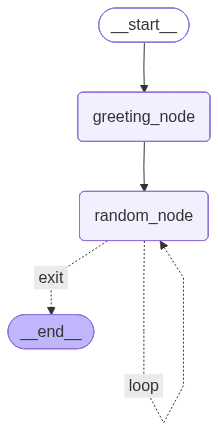

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
initial_state = AgentState(name="Pawneet", numbers=[])
app.invoke(initial_state)

{'name': 'Hi Pawneet! How are you?', 'numbers': [2, 9, 0, 7, 2], 'counter': 5}